In [16]:
import keras
import tensorflow as tf
import gc

In [35]:
#Importing CIFAR10 dataset.
(train_img, train_class), (test_img, test_class) = tf.keras.datasets.cifar10.load_data()

In [36]:
#Rescaling dataset between 0 and 1, and getting a look at the data.
X_train_CNN = train_img/255.0
X_test_CNN = test_img/255.0
print(train_img.shape, end="\n\n")
print(train_img[5], end="\n\n")
print(X_train_CNN[5], end="\n\n")

(50000, 32, 32, 3)

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]

[[[0.62352941 0.4        0.39607843]
  [0.58823529 0.35686275 0.37254902]
  [0.6        0.37254902 0.38039216]
  ...
  [0.35686275 0.27843137 0.21960784]
  [0.29019608 0.24705882 0.21568627]
  [0.29803922 0.22745098 0.21568627]]

 [[0.55686275 0.29411765 0.26666667]
  [0.57254902 0.28235294 0.25882353]
  [0.60784314 0.29803922 0.25490196]
  ...
  

In [42]:
#Convert classes to one-hot form.
Y_train_CNN = keras.utils.np_utils.to_categorical(train_class, num_classes=10)
Y_test_CNN = keras.utils.np_utils.to_categorical(test_class, num_classes=10)
print(Y_train_CNN.shape, end = "\n\n")
print(train_class[5], end="\n\n")
print(Y_train_CNN[5], end="\n\n")

(50000, 10)

[1]

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]



In [47]:
def create_cnn_classifier(input_shape):
    """
    This creates a cnn model for the CIFAR10 classfication.
    """
    
    inputs = keras.Input(shape=input_shape, name="inputs")
    conv_layer_1 = keras.layers.Conv2D(16, 3, name="conv_layer_1")(inputs)
    act_layer_1 = keras.layers.ReLU(name = "act_layer_1")(conv_layer_1)
    pool_layer_1 = keras.layers.MaxPool2D(2, 2, name="pool_layer_1")(act_layer_1)
    conv_layer_2 = keras.layers.Conv2D(32, 3, name="conv_layer_2")(pool_layer_1)
    act_layer_2 = keras.layers.ReLU(name="act_layer_2")(conv_layer_2)
    pool_layer_2 = keras.layers.MaxPool2D(2, 2, name="pool_layer_2")(act_layer_2)
    conv_layer_3 = keras.layers.Conv2D(64, 3, name="conv_layer_3")(pool_layer_2)
    act_layer_3 = keras.layers.ReLU(name="act_layer_3")(conv_layer_3)
    pool_layer_3 = keras.layers.MaxPool2D(2, 2, name="pool_layer_3")(act_layer_3)
    flatten_layer = keras.layers.Flatten(name="flatten_layer")(pool_layer_3)
    outputs = keras.layers.Dense(10, activation="softmax", name="outputs")(flatten_layer)
    
    model = keras.Model(inputs, outputs)
    
    return model

In [48]:
#A look at the CNN thus made.
cnn_model = create_cnn_classifier(X_train_CNN.shape[1:])
cnn_model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 30, 30, 16)        448       
_________________________________________________________________
act_layer_1 (ReLU)           (None, 30, 30, 16)        0         
_________________________________________________________________
pool_layer_1 (MaxPooling2D)  (None, 15, 15, 16)        0         
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 13, 13, 32)        4640      
_________________________________________________________________
act_layer_2 (ReLU)           (None, 13, 13, 32)        0         
_________________________________________________________________
pool_layer_2 (MaxPooling2D)  (None, 6, 6, 32)          0  

In [49]:
cnn_model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.categorical_crossentropy, metrics=[keras.metrics.CategoricalAccuracy()])
cnn_model.fit(X_train_CNN, Y_train_CNN, batch_size=32, epochs=10, validation_data=(X_test_CNN, Y_test_CNN))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 71s 1ms/step - loss: 1.6003 - categorical_accuracy: 0.4158 - val_loss: 1.4641 - val_categorical_accuracy: 0.4825
Epoch 2/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.2824 - categorical_accuracy: 0.5465 - val_loss: 1.2508 - val_categorical_accuracy: 0.5540
Epoch 3/10
50000/50000 [==============================] - 72s 1ms/step - loss: 1.1531 - categorical_accuracy: 0.5985 - val_loss: 1.1521 - val_categorical_accuracy: 0.5973
Epoch 4/10
50000/50000 [==============================] - 74s 1ms/step - loss: 1.0672 - categorical_accuracy: 0.6282 - val_loss: 1.1105 - val_categorical_accuracy: 0.6110
Epoch 5/10
50000/50000 [==============================] - 79s 2ms/step - loss: 1.0058 - categorical_accuracy: 0.6505 - val_loss: 1.0388 - val_categorical_accuracy: 0.6368
Epoch 6/10
50000/50000 [==============================] - 76s 2ms/step - loss: 0.9559 - categor

In [55]:
def deconv_layer_1(model_in, input_shape):
    """
    Deconvolution to check shape.
    """
    input_layer = model_in.input
    conv_out = model_in.get_layer("pool_layer_1").output
    upsample_1 = keras.layers.UpSampling2D(2, name="upsample_1")(conv_out)
    relu_1 = keras.layers.ReLU(name="relu_1")(upsample_1)
    deconv_1 = keras.layers.Conv2DTranspose(16, 3, name="deconv_1")(relu_1)
    final_conv = keras.layers.Conv2D(3, 3, activation="sigmoid", padding="same", name="final_conv")(deconv_1)
    
    model = keras.Model(input_layer, final_conv)
    
    for layer in model.layers:
        if layer.name not in ["upsample_1", "relu_1", "deconv_1", "final_conv"]:
            layer.trainable=False
    
    return model

deconv_model_1 = deconv_layer_1(cnn_model, X_train_CNN.shape[1:])
deconv_model_1.summary()

Model: "model_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 32, 32, 3)         0         
_________________________________________________________________
conv_layer_1 (Conv2D)        (None, 30, 30, 16)        448       
_________________________________________________________________
act_layer_1 (ReLU)           (None, 30, 30, 16)        0         
_________________________________________________________________
pool_layer_1 (MaxPooling2D)  (None, 15, 15, 16)        0         
_________________________________________________________________
upsample_1 (UpSampling2D)    (None, 30, 30, 16)        0         
_________________________________________________________________
relu_1 (ReLU)                (None, 30, 30, 16)        0         
_________________________________________________________________
deconv_1 (Conv2DTranspose)   (None, 32, 32, 16)        232

In [56]:
deconv_model_1.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy)
deconv_model_1.fit(X_train_CNN, X_train_CNN, batch_size=32, epochs = 10, validation_data=(X_test_CNN, X_test_CNN))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 186s 4ms/step - loss: 0.5748 - val_loss: 0.5722
Epoch 2/10
50000/50000 [==============================] - 193s 4ms/step - loss: 0.5713 - val_loss: 0.5716
Epoch 3/10
50000/50000 [==============================] - 196s 4ms/step - loss: 0.5711 - val_loss: 0.5716
Epoch 4/10
50000/50000 [==============================] - 198s 4ms/step - loss: 0.5710 - val_loss: 0.5715
Epoch 5/10
50000/50000 [==============================] - 196s 4ms/step - loss: 0.5710 - val_loss: 0.5715
Epoch 6/10
50000/50000 [==============================] - 212s 4ms/step - loss: 0.5710 - val_loss: 0.5715
Epoch 7/10
50000/50000 [==============================] - 215s 4ms/step - loss: 0.5710 - val_loss: 0.5715
Epoch 8/10
50000/50000 [==============================] - 206s 4ms/step - loss: 0.5710 - val_loss: 0.5716
Epoch 9/10
50000/50000 [==============================] - 195s 4ms/step - loss: 0.5709 - val_loss: 0.5

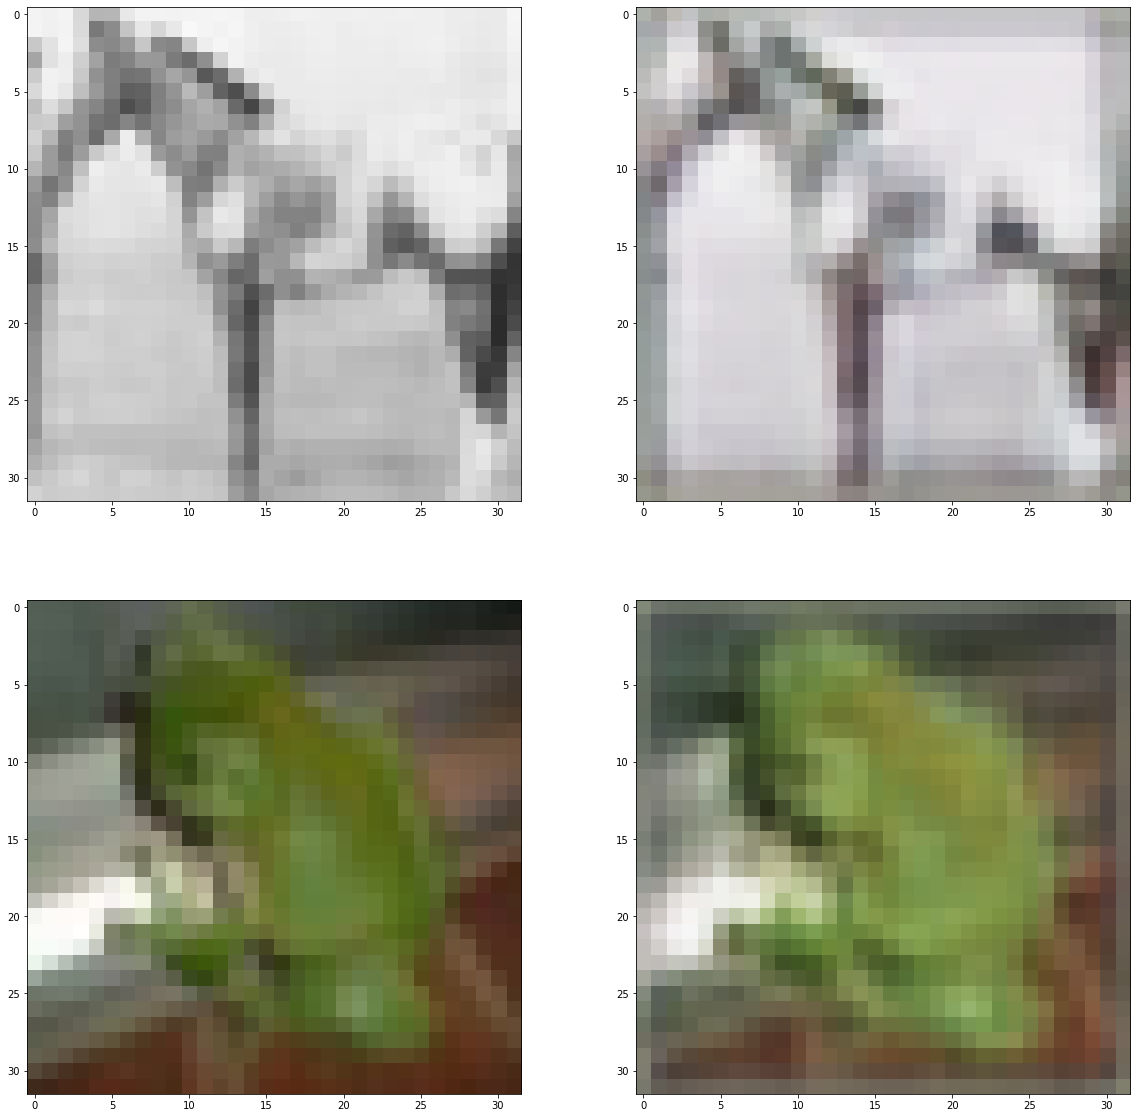

In [66]:
#Example reconstruction of filters

import matplotlib.pyplot as plt


fig, ax = plt.subplots(2,2, figsize=(20, 20))
ax[0,0].imshow(X_test_CNN[83])
ax[0,1].imshow(deconv_model_1.predict(X_test_CNN[83:84]).reshape(X_test_CNN.shape[1:]))
ax[1,0].imshow(X_test_CNN[7])
ax[1,1].imshow(deconv_model_1.predict(X_test_CNN[7:8]).reshape(X_test_CNN.shape[1:]))